One File

In [58]:
import json
mode = 'd'
file_path = r'C:/Users/linzj/Desktop/result/S0_PPO_try_train.txt'
with open(file_path, 'r') as file:
    data = json.load(file)

average_reward = data['all_average_reward']
actor_loss = data['all_actor_loss']
critic_loss = data['all_critic_loss']
# if mode == 'd':
#     sep_reward = data['all_determiners']
# elif mode == 'p': 
#     sep_reward = data['all_prepositions']

episode_reward = data['all_episode_reward']

max(average_reward)


-4.17

In [2]:
success_rate = []
for i in range(len(episode_reward)-1000):
    slice_episode_rewards = episode_reward[i:i+1000]
    success_rate.append(len([x for x in slice_episode_rewards if x > 7])/1000.0)

In [59]:
import matplotlib.pyplot as plt
# Generate x-axis values as the indices of the list
print(max(success_rate))
x_axis = range(len(success_rate))
plt.plot(x_axis, success_rate)
plt.axhline(y=0.8, color='red', linestyle='--')
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.title('8d')
plt.show() 

NameError: name 'success_rate' is not defined

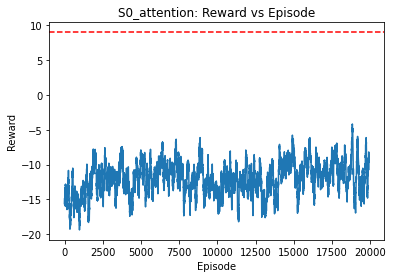

In [60]:
import matplotlib.pyplot as plt
# Generate x-axis values as the indices of the list
x_axis = range(len(average_reward))
plt.plot(x_axis, average_reward)
plt.axhline(y=9, color='red', linestyle='--')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('S0_attention: Reward vs Episode')
plt.show() 

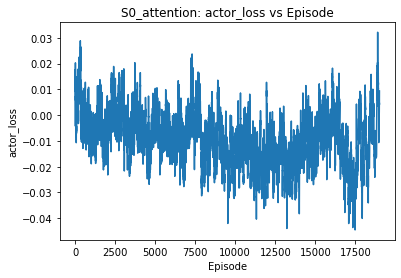

In [63]:
import matplotlib.pyplot as plt
# Generate x-axis values as the indices of the list
interval = 1000
x_axis = range(len(actor_loss)-interval)
average_loss = []
for i in range(0, len(actor_loss)-interval):
    average = sum(actor_loss[i:i+interval]) /interval
    average_loss.append(average)

# Plotting the figure
plt.plot(x_axis, average_loss)
plt.xlabel('Episode')
plt.ylabel('actor_loss')
plt.title('S0_attention: actor_loss vs Episode')
plt.show()

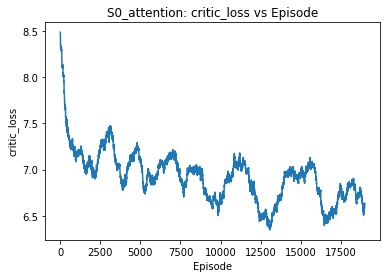

In [64]:
import matplotlib.pyplot as plt
# Generate x-axis values as the indices of the list
x_axis = range(len(critic_loss)-interval)
average_loss = []
for i in range(0, len(critic_loss)-interval):
    average = sum(critic_loss[i:i+interval]) /interval
    average_loss.append(average)

# Plotting the figure
plt.plot(x_axis, average_loss)
plt.xlabel('Episode')
plt.ylabel('critic_loss')
plt.title('S0_attention: critic_loss vs Episode')
plt.show()

In [ ]:
import numpy as np
success_rate = np.array(success_rate)
index = np.argmax(success_rate > 0.8)
index

In [4]:
import numpy as np
average_reward = np.array(average_reward)
index = np.argmax(average_reward > 9)
index

3773

In [ ]:
import matplotlib.pyplot as plt
bins = [4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
plt.hist(episode_reward[25405:26405], bins=bins, color='blue', edgecolor='black')
plt.title('Distribution of Episode Rewards')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.show()

In [ ]:
episode_reward[25405:26405].count(10)

In [ ]:
max(average_reward[12500:])

In [ ]:
keys_to_remove = [key for key, value in sep_reward.items() if value == []]
for key in keys_to_remove:
    del sep_reward[key]
sep_reward

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
min_len = float('inf')
result = {}
for item in sep_reward:
    min_len = min(min_len,len(sep_reward[item]))
# Generate x-axis values as the indices of the list
x_axis = range(min_len)
window_size = 1000  # Adjust the window size as needed for smoothing

for key, value in sep_reward.items():
    smoothed_values = np.convolve(value[:min_len], np.ones(window_size)/window_size, mode='valid')
    # Adjust mode as needed. 'valid' means no zero-padding.

    # Create x-axis values for the smoothed data
    smoothed_x_axis = range(len(smoothed_values))

    plt.plot(smoothed_x_axis, smoothed_values, label=key)
    result[key] = np.argmax(smoothed_values > 8.44)


plt.axhline(y=9, color='red', linestyle='--')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward vs Episode')
plt.legend() 
plt.show()

In [ ]:
result

Multiple Files

In [31]:
import json
file_paths = ['C:/Users/linzj/Desktop/result/S3_d_attention_1_train.txt','C:/Users/linzj/Desktop/result/S3_d_attention_2_train.txt']
episodes = [12999,0]
average_rewards = []
episode_rewards = []
actor_losses = []
critic_losses = []
sep_reward = {  
        'A': [],
        'Few':[],
        'Some':[],
        'Many':[],
        'This':[],
        'That':[],
        'These':[],
        'Those':[]
    }
dp_rewards = []
for file_path,epi in zip(file_paths,episodes):
    with open(file_path, 'r') as file:
        data = json.load(file)
    if epi!=0:
        average_reward = data['all_average_reward'][:epi]
        episode_reward = data['all_episode_reward'][:epi]
        actor_loss = data['all_actor_loss'][:epi]
        critic_loss = data['all_critic_loss'][:epi]
        # determiner_reward = data['all_determiners']
        # for key,value in determiner_reward.items():
        #     sep_reward[key] = sep_reward[key][:epi] + value
    else:
        average_reward = data['all_average_reward']
        episode_reward = data['all_episode_reward']
        actor_loss = data['all_actor_loss']
        critic_loss = data['all_critic_loss']
        # determiner_reward = data['all_determiners']
        # for key,value in determiner_reward.items():
        #     sep_reward[key] = sep_reward[key] + value
    average_rewards.extend(average_reward)
    episode_rewards.extend(episode_reward)
    actor_losses.extend(actor_loss)
    critic_losses.extend(critic_loss)




-4.629


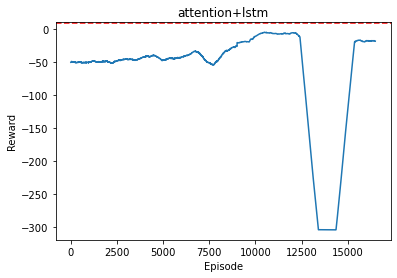

In [35]:
import matplotlib.pyplot as plt
# Generate x-axis values as the indices of the list
print(max(average_rewards))
x_axis = range(len(average_rewards))
plt.plot(x_axis, average_rewards)
plt.axhline(y=9, color='red', linestyle='--')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('attention+lstm')
plt.show() 

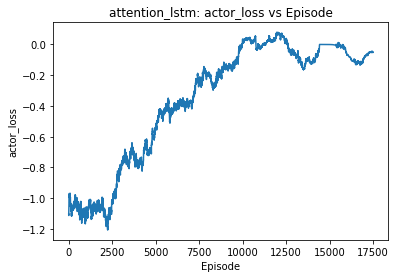

In [36]:
import matplotlib.pyplot as plt
# Generate x-axis values as the indices of the list
interval = 1000
x_axis = range(len(actor_losses)-1000)
average_loss = []
for i in range(0, len(actor_losses)-interval):
    average = sum(actor_losses[i:i+interval]) /interval
    average_loss.append(average)

# Plotting the figure
plt.plot(x_axis, average_loss)
plt.xlabel('Episode')
plt.ylabel('actor_loss')
plt.title('attention_lstm: actor_loss vs Episode')
plt.show()

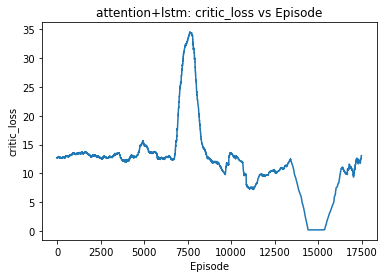

In [37]:
import matplotlib.pyplot as plt
# Generate x-axis values as the indices of the list
interval = 1000
x_axis = range(len(critic_losses)-1000)
average_loss = []
for i in range(0, len(critic_losses)-interval):
    average = sum(critic_losses[i:i+interval]) /interval
    average_loss.append(average)

# Plotting the figure
plt.plot(x_axis, average_loss)
plt.xlabel('Episode')
plt.ylabel('critic_loss')
plt.title('attention+lstm: critic_loss vs Episode')
plt.show()

In [ ]:
success_rate= []
for i in range(len(episode_rewards)-1000):
    slice_episode_rewards = episode_rewards[i:i+1000]
    success_rate.append(len([x for x in slice_episode_rewards if x > 7])/1000.0)


In [ ]:
mean = 0
std_dev = 0.01
length = 45
# Generate random numbers with the desired properties
success_rate_d = []
for i in success_rate:
    random_numbers = np.random.normal(mean, std_dev, length)
    for j in random_numbers:
        success_rate_d.append(i+j)

In [ ]:

import matplotlib.pyplot as plt
# Generate x-axis values as the indices of the list
print(max(success_rate_d))
x_axis = range(len(success_rate_d))
plt.plot(x_axis, success_rate_d)
plt.axhline(y=0.8, color='red', linestyle='--')
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.title('8p')
plt.show() 

In [ ]:
success_rate_d = success_rate

In [ ]:
import numpy as np
success_rate = np.array(success_rate)
index = np.argmax(success_rate > 0.8)
index

In [ ]:
import numpy as np
average_rewards = np.array(average_rewards)
index = np.argmax(average_rewards > 8.5)
index

In [ ]:
import numpy as np
average_rewards = np.array(average_rewards[100000:])
index = np.argmax(average_rewards < 0)
index

In [ ]:
keys_to_remove = [key for key, value in sep_reward.items() if len(value) < 10000]
for key in keys_to_remove:
    del sep_reward[key]
sep_reward

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
min_len = float('inf')
results = {}
for item in sep_reward:
    min_len = min(min_len,len(sep_reward[item]))
# Generate x-axis values as the indices of the list
x_axis = range(min_len)
window_size = 1000  # Adjust the window size as needed for smoothing

for key, value in sep_reward.items():
    smoothed_values = np.convolve(value[:min_len], np.ones(window_size)/window_size, mode='valid')
    # Adjust mode as needed. 'valid' means no zero-padding.
    results[key] = np.argmax(smoothed_values > 8.5)
    # Create x-axis values for the smoothed data
    smoothed_x_axis = range(len(smoothed_values))

    plt.plot(smoothed_x_axis, smoothed_values, label=key)

plt.axhline(y=9, color='red', linestyle='--')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward vs Episode')
plt.legend() 
plt.show()

In [ ]:
# Generate x-axis values as the indices of the lists
window_size = 1000

smoothed_success_rate_d = np.convolve(success_rate_d, np.ones(window_size)/window_size, mode='valid')
smoothed_success_rate_e = np.convolve(success_rate_e, np.ones(window_size)/window_size, mode='valid')
smoothed_success_rate_f = np.convolve(success_rate_f, np.ones(window_size)/window_size, mode='valid')
# Plot success_rate_a
plt.plot(range(len(success_rate_d)), success_rate_d, label='8P')

# Plot success_rate_b
plt.plot(range(len(smoothed_success_rate_e)), smoothed_success_rate_e, label='4P -> 8P')

# Plot success_rate_c
plt.plot(range(len(smoothed_success_rate_f)), smoothed_success_rate_f, label='2P -> 4P -> 8P')

# Add a horizontal line at y=0.8
plt.axhline(y=0.8, color='red', linestyle='--', label='Performance Criterion')
plt.axvline(x=1575776, color='orange', linestyle='--')
plt.axvline(x=935776, color='green', linestyle='--')
plt.axvline(x=1204189, color='green', linestyle='--')
# Add labels and title
plt.xlabel('Training Episode')
plt.ylabel('Success Rate')
plt.title('Comparison of Success Rates')
plt.legend()  # Display legend
plt.show()

In [ ]:
results

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
window_size = 1000

file_path = r'C:\Users\linzj\Desktop\final_result\init_S2_4_train.txt'   
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract lists from the loaded data
average_reward_1_onehot = data['all_average_reward']

# Load the JSON data from the text file
file_path = r'C:\Users\linzj\Desktop\final_result\init_S2_2_train.txt'   
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract lists from the loaded data
average_reward_2_onehot = data['all_average_reward']

# Load the JSON data from the text file
file_path = r'C:\Users\linzj\Desktop\final_result\init_S2_3_train.txt'   
with open(file_path, 'r') as file:
    data = json.load(file)
average_reward_3_onehot = data['all_average_reward']

file_path = r'C:\Users\linzj\Desktop\final_result\init_S2_2_test.txt'   
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract lists from the loaded data
average_reward_1_onehot_test = data['all_average_reward']

# Load the JSON data from the text file
file_path = r'C:\Users\linzj\Desktop\final_result\init_S2_3_test.txt'   
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract lists from the loaded data
average_reward_2_onehot_test = data['all_average_reward']

# Load the JSON data from the text file
file_path = r'C:\Users\linzj\Desktop\final_result\init_S2_4_test.txt'   
with open(file_path, 'r') as file:
    data = json.load(file)
average_reward_3_onehot_test = data['all_average_reward']

epochs_onehot = np.array([i for i in range(1,109732)])
learning_curve1 = np.array(average_reward_1_onehot[:110730])
learning_curve2 = np.array(average_reward_2_onehot[:110730])
learning_curve3 = np.array(average_reward_3_onehot[:110730])


learning_curve1_test = np.array(average_reward_1_onehot_test[:110730])
learning_curve2_test = np.array(average_reward_2_onehot_test[:110730])
learning_curve3_test = np.array(average_reward_3_onehot_test[:110730])

mean_curve_onehot = np.mean([learning_curve1, learning_curve2,learning_curve3], axis=0)
mean_curve_onehot_test = np.mean([learning_curve1_test, learning_curve2_test,learning_curve3_test], axis=0)
smoothed_values = np.convolve(mean_curve_onehot, np.ones(window_size)/window_size, mode='valid')
smoothed_values_test = np.convolve(mean_curve_onehot_test, np.ones(window_size)/window_size, mode='valid')
plt.plot(epochs_onehot, smoothed_values, color='black',label='Train Environment')
plt.plot(epochs_onehot, smoothed_values_test, color='blue',label='Test Environemnt')

plt.axhline(y=8.6, color='black', linestyle='--', label='Performance Criterion')
plt.xlabel('Training Episodes',fontsize = 10)
plt.ylabel('Average Reward',fontsize = 10)  # Replace with the appropriate metric
plt.title('Learning Curve of RL agent',fontsize = 15, fontweight='bold')
plt.legend()

plt.show()



In [ ]:
import json
file_path = r'C:/Users/linzj/Desktop/result/S3_p_2_train.txt'
with open(file_path, 'r') as file:
    data = json.load(file)

average_reward_2 = data['all_average_reward']

# determiner_reward_1 = data['all_determiners']
preposition_reward_2 = data['all_prepositions']

episode_reward_2 = data['all_episode_reward']

max(average_reward_2)

In [ ]:
# epi = 183203
# average_reward = average_reward_1[:epi]+average_reward_2
# episode_reward = episode_reward_1[:epi]+episode_reward_2
average_reward = average_reward_1
# determiner_reward = determiner_reward_1
# preposition_reward = preposition_reward_1
episode_reward = episode_reward_1

In [ ]:
min_len = 0
# preposition_reward = preposition_reward_1
# for key,value in preposition_reward_2.items():
#     preposition_reward[key] = preposition_reward[key][:epi] + value
for key,value in preposition_reward.items():
    if min_len == 0 or min_len > len(preposition_reward[key]):
        min_len = len(preposition_reward[key])
min_len

In [ ]:
min_len = 0
determiner_reward = determiner_reward_1
for key,value in determiner_reward_2.items():
    determiner_reward[key] = determiner_reward[key][:epi] + value
for key,value in determiner_reward.items():
    if min_len == 0 or min_len > len(determiner_reward[key]):
        min_len = len(determiner_reward[key])
min_len

In [ ]:
average_reward = []
interval = 1000
for i in range(0, len(episode_reward)-interval):
    average = sum(episode_reward[i:i+interval]) /interval
    average_reward.append(average)
print(max(average_reward),average_reward.index(max(average_reward))+1000)

In [ ]:
len(average_reward)

In [ ]:
average_determiner_reward = {}
for element in determiner_reward:
    average_determiner_reward[element] = []
    for i in range(0, len(determiner_reward[element])-100):
        average = sum(determiner_reward[element][i:i+100]) /100
        average_determiner_reward[element].append(average)

determiner = {}
for element in average_determiner_reward:
    determiner[element] = []
    for i in range(len(average_determiner_reward[element])):
        if average_determiner_reward[element][i] >= 9: 
            determiner[element].append(i+interval)
            break
    determiner[element].append(max(average_determiner_reward[element]))
determiner

In [ ]:
interval = 1000
average_preposition_reward = {}
for element in preposition_reward:
    average_preposition_reward[element] = []
    for i in range(0, len(preposition_reward[element])-100):
        average = sum(preposition_reward[element][i:i+100]) /100
        average_preposition_reward[element].append(average)
        
prepositoin = {}
for element in average_preposition_reward:
    prepositoin[element] = []
    for i in range(len(average_preposition_reward[element])):
        if average_preposition_reward[element][i] >= 9: 
            prepositoin[element].append(i+interval)
            break
    prepositoin[element].append(max(average_preposition_reward[element]))
prepositoin

In [ ]:
for i in range(len(average_reward)):
    if average_reward[i] >= 9: 
        print(i)
        break

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x-axis values as the indices of the list
x_axis = range(min_len)
window_size = 3000  # Adjust the window size as needed for smoothing

for key, value in preposition_reward.items():
    smoothed_values = np.convolve(value[:min_len], np.ones(window_size)/window_size, mode='valid')
    # Adjust mode as needed. 'valid' means no zero-padding.

    # Create x-axis values for the smoothed data
    smoothed_x_axis = range(len(smoothed_values))

    plt.plot(smoothed_x_axis, smoothed_values, label=key)

plt.axhline(y=9, color='red', linestyle='--')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward vs Episode')
plt.legend() 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# Generate x-axis values as the indices of the list
x_axis = range(len(average_reward))
plt.plot(x_axis, average_reward)
plt.axhline(y=9, color='red', linestyle='--')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward vs Episode')
plt.show() 

In [ ]:
import matplotlib.pyplot as plt
# Generate x-axis values as the indices of the list
interval = 100
x_axis = range(len(actor_loss)-100)
average_loss = []
for i in range(0, len(actor_loss)-interval):
    average = sum(actor_loss[i:i+interval]) /interval
    average_loss.append(average)

# Plotting the figure
plt.plot(x_axis, average_loss)
plt.xlabel('Episode')
plt.ylabel('actor_loss')
plt.title('S0: actor_loss vs Episode [with reference]')
plt.show()

In [24]:
import matplotlib.pyplot as plt
# Generate x-axis values as the indices of the list
x_axis = range(len(critic_loss)-100)
average_loss = []
for i in range(0, len(critic_loss)-interval):
    average = sum(critic_loss[i:i+interval]) /interval
    average_loss.append(average)

# Plotting the figure
plt.plot(x_axis, average_loss)
plt.xlabel('Episode')
plt.ylabel('critic_loss')
plt.title('S0: critic_loss vs Episode [with reference]')
plt.show()

NameError: name 'interval' is not defined

In [ ]:
import matplotlib.pyplot as plt
# Generate x-axis values as the indices of the list
x_axis = range(len(entropy_loss)-100)
average_loss = []
for i in range(0, len(entropy_loss)-interval):
    average = sum(entropy_loss[i:i+interval]) /interval
    average_loss.append(average)

# Plotting the figure
plt.plot(x_axis, average_loss)
plt.xlabel('Episode')
plt.ylabel('entropy_loss')
plt.title('S0: entropy_loss vs Episode [with reference]')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# Generate x-axis values as the indices of the list
x_axis = range(len(total_loss)-100)
average_loss = []
for i in range(0, len(total_loss)-interval):
    average = sum(total_loss[i:i+interval]) /interval
    average_loss.append(average)

# Plotting the figure
plt.plot(x_axis, average_loss)
plt.xlabel('Episode')
plt.ylabel('total_loss')
plt.title('S0: total_loss vs Episode [with reference]')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# Generate x-axis values as the indices of the list
x_axis = range(len(steps)-100)
average_loss = []
for i in range(0, len(steps)-interval):
    average = sum(steps[i:i+interval]) /interval
    average_loss.append(average)

# Plotting the figure
plt.plot(x_axis, average_loss)
plt.xlabel('Episode')
plt.ylabel('steps')
plt.title('S0: steps vs Episode [with reference]')
plt.show()

Word

In [ ]:
import docx2txt
import re

# Extract text from the Word file
text = docx2txt.process(r'C:\Users\linzj\Desktop\result\S3_CS_1.docx')


# Extract number after "Average Reward"
average_reward = re.findall(r'Average Reward (-?\d+\.?\d*)', text)
average_reward = [float(num) for num in average_rewards]

print(max(average_reward))

# # Extract number after "Actor Loss"
# episode_reward = re.findall(r'Episode Reward: (-?\d+\.?\d*)', text)
# episode_reward = [float(num) for num in episode_reward]

# # Extract number after "Actor Loss"
# actor_loss = re.findall(r'Actor loss: (-?\d+\.?\d*)', text)
# actor_loss = [float(num) for num in actor_loss]

# # Extract number after "Critic Loss"
# critic_loss = re.findall(r'Critic loss: (-?\d+\.?\d*)', text)
# critic_loss = [float(num) for num in critic_loss]

# # Extract number after "Entropy Loss"
# entropy_loss = re.findall(r'Entropy loss: (-?\d+\.?\d*)', text)
# entropy_loss = [float(num) for num in entropy_loss]

# # Extract number after "Total Loss"
# total_loss = re.findall(r'Total Loss: (-?\d+\.?\d*)', text)
# total_loss = [float(num) for num in total_loss]

# # Extract number after "Total Step"
# total_steps = re.findall(r'Total Steps: (-?\d+\.?\d*)', text)
# total_steps = [float(num) for num in total_steps]

In [ ]:
average_rewards_train,average_rewards_test = [],[]
for i in range(1,len(average_rewards)):
    if ((i-1)//100) % 2: 
        average_rewards_test.append(average_rewards[i])
    else: 
        average_rewards_train.append(average_rewards[i])
max(average_rewards_test)





In [ ]:
import json
ALG_NAME = 'S2bert'
ENV_ID = 1
data = {
            'all_average_reward': average_rewards_train,
            
        } 
file_path = rf'C:\Users\linzj\Desktop\result\{ALG_NAME}_{ENV_ID}_train.txt'
with open(file_path, 'w') as file:
    json.dump(data, file)

test_data = {
            'all_average_reward': average_rewards_test,
            
        } 
file_path = rf'C:\Users\linzj\Desktop\result\{ALG_NAME}_{ENV_ID}_test.txt'
with open(file_path, 'w') as file:
    json.dump(test_data, file)

In [ ]:
for i in range(len(average_rewards_train)):
    if average_rewards_train[i] >=9: 
        print(i)
        break

In [ ]:
import matplotlib.pyplot as plt

# Sample data


# Generate x-axis values as the indices of the list
x_axis = range(len(average_rewards_test))

# Plotting the figure
plt.plot(x_axis, average_rewards_test)
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.title('S2 -> S1: Train')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Sample data


# Generate x-axis values as the indices of the list
x_axis = range(len(actor_loss)-100)
interval = 100  # Interval for averaging

average_loss = []
for i in range(0, len(actor_loss)-interval):
    average = sum(actor_loss[i:i+interval]) /interval
    average_loss.append(average)

# Plotting the figure
plt.plot(x_axis, average_loss)
plt.xlabel('Episode')
plt.ylabel('Actor Loss')
plt.title('S0: Actor Loss vs Episode [with reference]')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Sample data


# Generate x-axis values as the indices of the list
x_axis = range(len(critic_loss)-100)
interval = 100  # Interval for averaging

average_loss = []
for i in range(0, len(critic_loss)-interval):
    average = sum(critic_loss[i:i+interval]) /interval
    average_loss.append(average)

# Plotting the figure
plt.plot(x_axis, average_loss)
plt.xlabel('Episode')
plt.ylabel('Critic Loss')
plt.title('S0: Critic Loss vs Episode [with reference]')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Sample data


# Generate x-axis values as the indices of the list
x_axis = range(len(entropy_loss)-100)
interval = 100  # Interval for averaging

average_loss = []
for i in range(0, len(entropy_loss)-interval):
    average = sum(entropy_loss[i:i+interval]) /interval
    average_loss.append(average)

# Plotting the figure
plt.plot(x_axis, average_loss)
plt.xlabel('Episode')
plt.ylabel('Entropy Loss')
plt.title('S0: Entropy Loss vs Episode [with reference]')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Sample data


# Generate x-axis values as the indices of the list
x_axis = range(len(total_loss)-100)
interval = 100  # Interval for averaging

average_loss = []
for i in range(0, len(total_loss)-interval):
    average = sum(total_loss[i:i+interval]) /interval
    average_loss.append(average)

# Plotting the figure
plt.plot(x_axis, average_loss)
plt.xlabel('Episode')
plt.ylabel('Total Loss')
plt.title('S0: Total Loss vs Episode [with reference]')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Sample data


# Generate x-axis values as the indices of the list
x_axis = range(len(total_steps)-100)
interval = 100  # Interval for averaging

average_step = []
for i in range(0, len(total_steps)-interval):
    average = sum(total_steps[i:i+interval]) /interval
    average_step.append(average)

# Plotting the figure
plt.plot(x_axis, average_step)
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.title('S0: Steps vs Episode [with reference]')
plt.show()

In [ ]:
import ast
file_path = r'C:\Users\linzj\Desktop\S0_withoutreference_290623.txt'
file = open(file_path, 'r')

# Read the contents of the file
content = file.read()
average_rewards = ast.literal_eval(content)

In [ ]:
import re
import open_clip
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
from itertools import product
import torch.nn.functional as F
embedding_dim = 128


class TextEncoder(nn.Module): 
    def __init__(self,embedding_dim):
        super(TextEncoder, self).__init__()

        self.encoded = nn.Embedding(49408,512)
        self.linear = nn.Linear(77,embedding_dim)

    def forward(self, x):
        print(x.size())       
        encoded = self.encoded(x)
        print(encoded.size())
        encoded = nn.AvgPool1d(kernel_size=encoded.size(-1))(encoded).squeeze()
        print(encoded.size())
        encoded = self.linear(encoded)
        print(encoded.size())
        return encoded
    
input_string = "Give me the blue prism, please!"


tokenizer = open_clip.get_tokenizer('ViT-B-32')
    
# Create the text encoder model
text_encoder = TextEncoder(embedding_dim)  # Use 'len(vocab)' to get the vocab_size
sequence = tokenizer(input_string) # Tokenize the input string
# sequence = F.normalize(sequence)
# sequence /= sequence.norm(dim=-1, keepdim=True)
# print(f'Normalized sequence: {sequence}')

encoded_tensor = text_encoder(sequence)